# Week 7 Lab

In [1]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)
 
from waves.tools.dsp import * 
from waves.tools.dsp.interpolator import *

## 5.1.b Continuous-time signal processing
$$
\begin{align}
\Omega &= \frac{rad}{s} = 2\pi F \\
F &= \frac{\Omega}{2\pi} \space Hertz(1/second) \\
period \space T &= \frac{1}{F} = \frac{2\pi}{\Omega} \\
\end{align}
$$

example:  

$$x(t) = e^{-\frac{t^2}{2\sigma^2}}$$

#### 鐘形曲線的 IDTFT 也是鐘形曲線

28.896395421142092
0.999998499999625


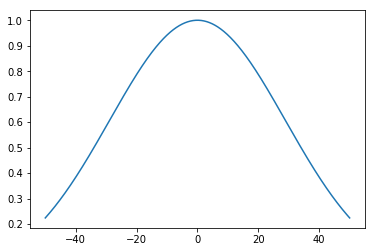

In [4]:
t = np.linspace(-50, 50, 1000)
sigma = np.std(t)
# alpha = 1
print(sigma)
x = np.exp(-t**2/(2*sigma**2))
print(max(x))
plt.plot(t, x);

$$
\begin{align}
X(j\Omega) = \sigma\sqrt{2\pi}e^{-\frac{\sigma^2}{2}\Omega^2}
\end{align}
$$

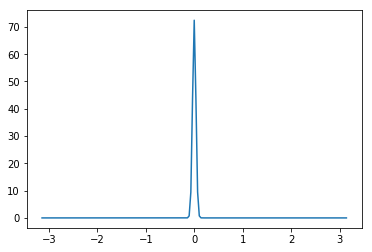

In [5]:
w = dsp.get_freq_bins()

amplitude = sigma * np.sqrt(PI2)
X_j_omega = amplitude * np.exp(-sigma**2/2*w**2)

plt.plot(w, X_j_omega);

### bandlimitedness

$$
\begin{align}
\Omega_N &= \frac{rad}{s} = \frac{2\pi Fs}{2} = \pi Fs \\
Fs &= \frac{\Omega_N}{\pi} \space Hertz(1/second) \\
Ts &= \frac{1}{Fs} = \frac{\pi}{\Omega_N} \\
\frac{\Omega_N}{\pi} &= Fs = \frac{1}{Ts}  \\
\end{align}
$$

bandlimited function 的 spectrum 為方形   

$$
\Phi(j\Omega) = 0 ;for  \space |\Omega| > \Omega_N \\
$$

相當一個 spectrum 為正方形  

$$
\begin{align}
\Phi(j\Omega) &= G \times rect(\frac{\Omega}{2\Omega_N}) \\
\end{align}
$$

其 IDTFT 之後的波型為 sinc function:  

$$
\begin{align} 
\phi(t) &= \frac{1}{2\pi} \int_{-\infty}^{\infty} \Phi(j\Omega) e^{j\Omega t} d\Omega \\ 
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} G \times rect(\frac{\Omega}{2\Omega_N}) \times  e^{j\Omega t} d\Omega \\
&= G\frac{\Omega_N}{\pi} sinc(\frac{\Omega_N}{\pi}t)  \\
\end{align}
$$

  

total bandwidth: $\Omega_B = 2\Omega_N $  

$Ts = \frac{2\pi}{\Omega_B} = \frac{\pi}{\Omega_N}$  

G = $\frac{\pi}{\Omega_N} = Ts $  

$$
\begin{align} 
\Phi(j\Omega) &= \frac{\pi}{\Omega_N} rec(\frac{\Omega}{2\Omega_N}) = Ts \times rec(\frac{\Omega}{2\Omega_N}) \\
\phi(t) &=  sinc(\frac{t}{Ts}) \\
\end{align}
$$


banslimited function 做 CTFT 計算 spectrum 的時候，使用 $\frac{\pi}{\Omega_N}$ 做 normalize，以便做 ICTFT 之後 amplitude 可以還原為 1


### Ts 變大 $\Omega_N$ 就變小

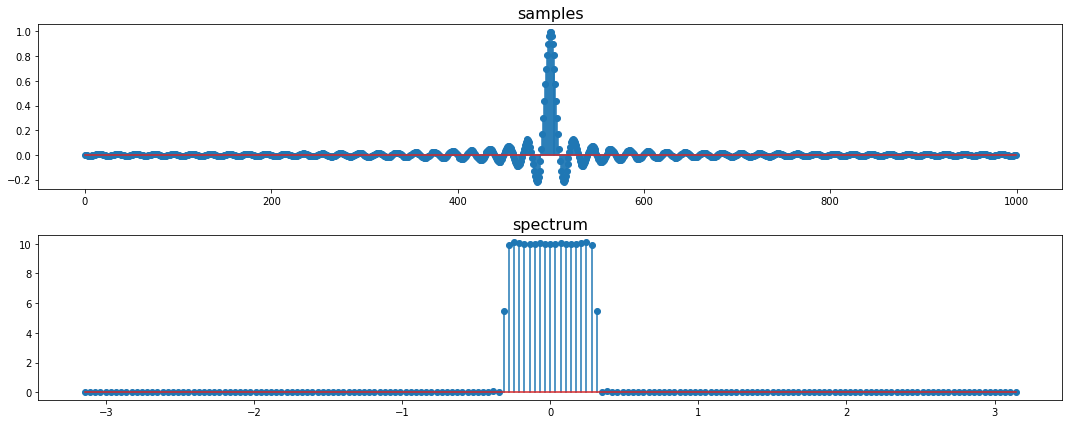

In [6]:
Ts = 1
_ = fourier.dtft(np.sinc(t/Ts))

### Ts 變小 $\Omega_N$ 就變大

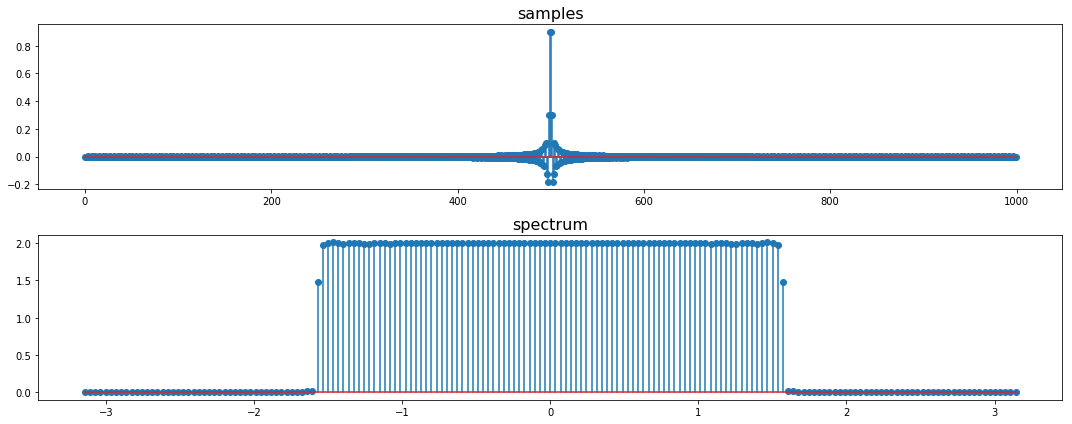

In [7]:
Ts = 1 / 5
_ = fourier.dtft(np.sinc(t/Ts))

## 5.2.a Polynomial interpolation

### Lagrange interpolation
$$ 
\begin{align}
L_n^{(N)}(t) &= \prod_{k = -N; k \neq n}^{N} \frac{t-k}{n-k}  \hspace{2cm} ; n = -N,...,N  \\
p(t) &= \sum_{n= -N}^{N} x[n]L_n^{(N)}(t)  \\
\end{align}
$$

In [8]:
N = [-3, -1, 0, 1, 2]
Y = [1, 2, 1, 3, -2]
# Y = [-3.4, 5.9, 1.4, 8.8, 2.6]

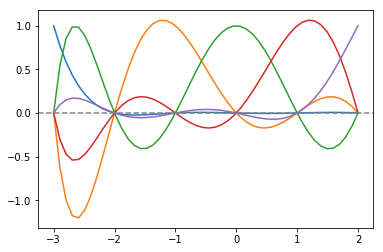

In [9]:
li = Lagrange()
li.plot_basis(N)

### $L_n^{(N)}(t)$ 只有在 t = n 的時候 y 值才會等於 1，t 是整數且 t <> n 的時候，y皆 == 0，所以對 x = 2 的點來說，只有與 $L_2^{(N)}$ 的乘積才會不等於 0

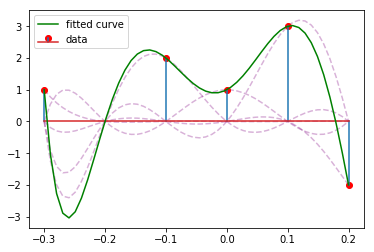

In [10]:
li = Lagrange(fs = 10, steps_between_samples = 10)
_ = li.poly_fit(Y, N, plot = True)

### Symbolic, 使用 SymPy

In [22]:
N = [-3, -1, 0, 1, 2]
Y = [1, 2, 1, 3, -2]
# Y = [-3.4, 5.9, 1.4, 8.8, 2.6]

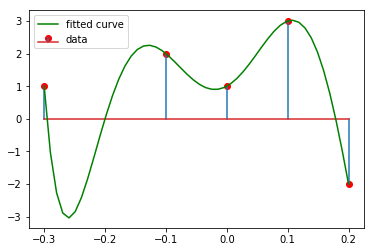

In [23]:
lis = Lagrange_symbolic(fs = 10, steps_between_samples = 10)
poly = lis.poly_fit(Y, N, plot = True)
poly

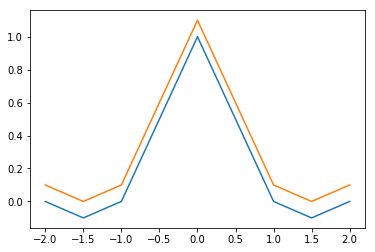

In [95]:
N = [-2, -1.5, -1, 0, 1, 1.5, 2]
Y = [0, -0.1, 0, 1, 0, -0.1, 0]
c = np.polyfit(N, Y, deg = 6)
plt.plot(N, Y); 

p = np.poly1d(c)
plt.plot(N, p(N) + .1);

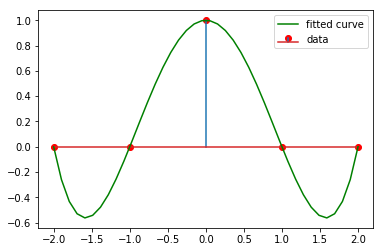

In [96]:
N = [-2, -1, 0, 1, 2]
Y = [0, 0, 1, 0, 0]

lis = Lagrange_symbolic(fs = 1, steps_between_samples = 10)
poly = lis.poly_fit(Y, N, plot = True)
poly

In [97]:
poly.factor()

In [98]:
var = list(poly.free_symbols)[0]
var

In [99]:
poly.subs(var, symbols('z'))

### 其實上例中 x,y 是 spectrum， x 類比於頻率, y 類比於 amplitude，而 Lagrange 的 polynormial basis 代表的 類比於 IDTFT 中的 $e^{j\omega n}$，是一個 wave 。

### 也可以說，把 $x[n]*L_n^{(N)}(t)$ 代表的是把 $ g(t) = [x[-N,...0,...N]]$ 與 Lagrange 的 polynormial basis 做內積投射到 basis 之上比便求出 amplitude，而在 "頻率"(x) 等於 2的時候，與   $L_2^{(N)}$ 才能有非零的內積，所以 y 就代表 amplitude。

### polynormial basis 代表的 類比於 IDTFT 中的 $e^{j\omega n}$，是一個 wave  

In [14]:
poly.all_coeffs()

In [15]:
poly(2)

## 5.2.b Local Interpolation

### 當 N 很大的時候 Lagrange poly 趨近於 Sinc

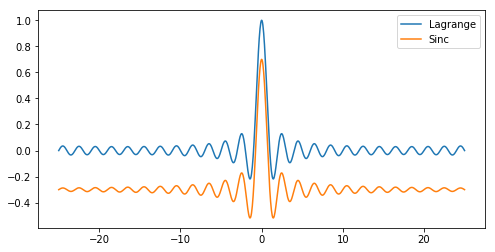

In [16]:
plt.figure(figsize = (8, 4))
b100 = Lagrange()
n = 25
N_size = 600
t = np.linspace(-n, n, 1001)
plt.plot(t, b100.get_base(range(-N_size, N_size), 0)(t), label = 'Lagrange')
plt.plot(t, np.sinc(t-0) - 0.3, label = 'Sinc')
plt.legend()
plt.show()

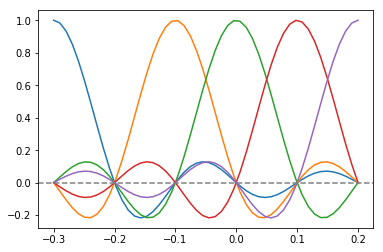

In [17]:
si = Sinc_interpolator(fs = 10, steps_between_samples = 10)
si.plot_basis(N)

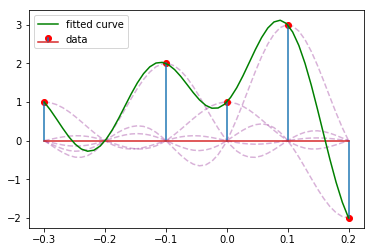

In [18]:
_ = si.poly_fit(Y, N, plot = True)

## 5.3.a The spectrum of interpolated signals

$
\begin{align}
{sinc \space and \space DFT: }\\
Ts &= \frac{\pi}{\Omega_n}  \\
\Omega_N &= \frac{\pi}{Ts} \\
\phi(t) &= sinc(\frac{t}{Ts})  \\
\Phi(j\Omega) = DFT\{\phi(t)\} &= \frac{\pi}{\Omega_N}rect(\frac{\Omega}{2\Omega_N}) = Ts \times rect(\frac{\Omega}{2\Omega_N})  \\
{sinc \space interpolated \space signal: }\\
x(t) &= \sum_{n= -\infty}^{\infty} x[n] sinc(\frac{t-nTs}{Ts})  \\
sepctrum \space of \space this \space signal: \\
X(j\Omega) &= \int_{-\infty}^{\infty} x(t)e^{-j\Omega t} dt \\
&= \int_{-\infty}^{\infty} \sum_{n= -\infty}^{\infty} x[n] sinc(\frac{t-nTs}{Ts})  e^{-j\Omega t} dt \\
&=\sum_{n= -\infty}^{\infty} x[n]  \int_{-\infty}^{\infty}  sinc(\frac{t-nTs}{Ts})  e^{-j\Omega t} dt \\ 
&=\sum_{n= -\infty}^{\infty} x[n]  (\frac{\pi}{\Omega_N}) rect(\frac{\Omega}{2\Omega_N}) e^{-j Ts \Omega n}  \\ 
&=(\frac{\pi}{\Omega_N}) rect(\frac{\Omega}{2\Omega_N}) \sum_{n= -\infty}^{\infty} x[n]   e^{-j (\frac{\pi}{\Omega_N}) \Omega n}  \\ 
&= 
\begin{array}{cc}
  \{ & 
    \begin{array}{cc} 
      (\frac{\pi}{\Omega_N}) X(e^{j\pi(\frac{\Omega}{\Omega_N})}) = Ts \times X(e^{j\pi(\frac{\Omega}{\Omega_N})})     & |\Omega| \leq \Omega_N \\ 
      0 & otherwise
    \end{array}
\end{array}
\end{align}
$


- #### 一個 descret time 的 series 本來只是一串數據，本身並無時間刻度，但是現在因為需要標示時間，所以定義 Ts，讓每個刻度 n 具有時間上的定位。
- #### 既然時間刻度定下了，那麼 frequency (Hz) 也就跟著被定義了。為了 CTFT <==> ICTFT 的轉換，令 $\Omega_N \times Ts = \pi$，ICTFT 之後的 amplitude 才能回復成 1。
- #### bandlimited function 的 spectrum 在 $|\Omega| > |\Omega_N| $的時候為 0，因此 ICTFT 的 $\Omega_N$ 相當於 DTFT 中的 $\pi$
- #### 一個 x[n] 經過 Ts 為準的 sinc(t/Ts) 做 interpolate 之後成為 x(t)
  - $X(j\Omega) = DTFT\{x(t)\} = \frac{\pi}{\Omega_N} X(j\pi\frac{\Omega}{\Omega_N})$

#### 用 sinc 來 interpolate 出來的 x(t)，其 DTFT 是 x[n] 的 DTFT  經過 (Ts) scale 的結果
- $\Omega_N \times Ts= \pi$  
- Ts 變大 ，$\Omega_N$ 變小，spectrum 變窄
- Ts 變小 ，$\Omega_N$ 變大，spectrum 變寬

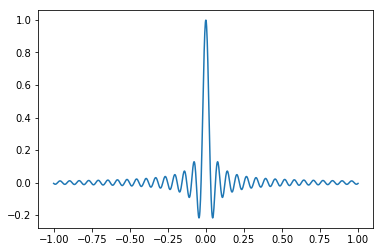

In [19]:
steps = 1000
t = np.linspace(-1, 1, steps)
omega_N = 100
Ts = np.pi/omega_N
phi = np.sinc(t/Ts)

omega = np.linspace(-np.pi, np.pi, steps)
rho = np.pi/omega_N* dsp.rect(omega/(2*omega_N))

plt.plot(t, phi);
Ts

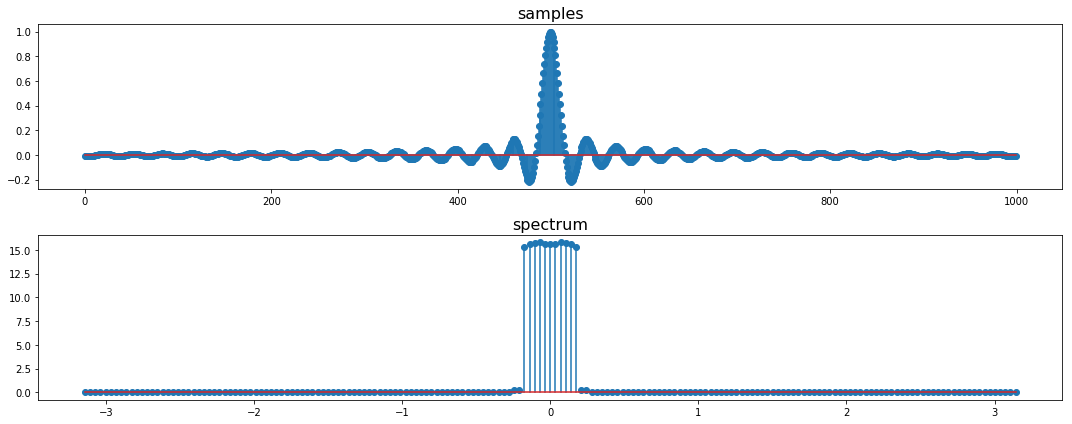

In [20]:
P = fourier.dtft(phi)

## 5.3.b The space of bandlimited functions

以下證明: 由 sinc(t/Ts - n) 所組成的 basis 是 orthogonal 的  

$$
\begin{align}
\phi^{(n)}(t) &= sinc(t-n)  \\
<\phi^{(n)}(t), \phi^{(m)}(t)> &= <\phi^{(0)}(t - n), \phi^{(0)}(t  -m)> \\
&= <\phi^{(0)}(t - n), \phi^{(0)}(m-t)> \\
&= \int_{-\infty}{\infty} sinc(t-n)sinc(m-t) dt \\
&= \int_{-\infty}{\infty} sinc(\tau)sinc(m - n - \tau) d\tau \\
&= (sinc*sinc)(m -n)  \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty}[rect(\frac{\Omega}{2\Omega})]^2 e^{j\Omega(m-n)} d\Omega
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} e^{j\Omega(m-n)} d\Omega  \\
&= 
\begin{array}{cc}
  \{ & 
    \begin{array}{cc} 
      1  & m = n \\ 
      0 & otherwise
    \end{array}
\end{array}
\end{align}
$$

so $sinc(t-n)$ functions have norm one, and are orthogonal to each others when shifted by integer.  

## 5.3.c The sampling theorem
#### Analysis (sampling) formula

$x[n] = <x(t), sinc(\frac{t}{Ts} -n)> = Ts \times x(nTs)$  

- 解析是一種 把 x(t) 對 "以n為中心的sinc波形" 做**投影**的動作
- 以n為中心的sinc波形 $sinc(\frac{t}{Ts} -n)$ 形成 Hilbert space 的一組 basis  


for any $ x(t) \in \Omega_N-BL$ the coefficients in the sinc basis are the the scaled samples $Ts \times x(nTs)$  

$$
\begin{align}
<\phi^{(n)}(t), x(t)> &= <sinc(t-n), x(t)> = <sinc(n-t), x(t)> \\
&= (sinc*x)(n) \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} rect(\frac{\Omega}{2\pi} X(j\Omega)e^{j\Omega n} d\Omega \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} X(j\Omega)e^{j\Omega n} d\Omega \\
&= x[n] \\
\end{align}
$$

#### Synthesis (reconstruction) formula 
$x(t) = \frac{1}{Ts}\sum_{n= -\infty}^{\infty} x[n] sinc(\frac{t}{Ts} -n)$  

- 合成是一種 把各 x[n]點加權的 "以n為中心的sinc波形" 做**加成**的動作
- 以n為中心的sinc波形 $sinc(\frac{t}{Ts} -n)$ 形成 Hilbert space 的一組 basis  

for any $ x(t) \in \Omega_N-BL$ a sufficient representatin is the sequency  $x[n] = x(nTs)$  


## 5.4.a Raw sampling

$$
\begin{align}
x(t) &= e^{j\Omega_0 t}  \\
period \hspace{1cm} T &= \frac{2\pi}{\Omega_0}  \\
FT\{ e^{j\Omega_0 t} \} &= 2\pi \delta(\Omega - \Omega_0)  \\
x[n] &= e^{j\Omega_0 Ts n} \\
\omega_0 &= \Omega_0 Ts  \\
x[n] &= e^{j\omega_0 n} \\
\end{align}
$$  

- $\omega_0 = \Omega_0 Ts$ is the digital frequency for x[n] ，也就是每次 sampling 時，所增加的角度
- when $  Ts < \frac{\pi}{\Omega_0} \Rightarrow   \omega_0 <  \pi$ : 
  - no aliasing.
  - 重新 interpolate 之後還原出來的 $\hat{\Omega_0} = \Omega_0$
- when $\frac{\pi}{\Omega_0} < Ts < \frac{2\pi}{\Omega_0} \Rightarrow \pi< \omega_0 < 2\pi$ : 
  - stepping is too big as if the frequency is negative.
  - 重新 interpolate 之後還原出來的 $\hat{\Omega_0} = \Omega_0 - \frac{2\pi}{Ts}$
- when $  Ts > \frac{2\pi}{\Omega_0} \Rightarrow   \omega_0 >  2\pi$ : 
  - aliasing.
  - 重新 interpolate 之後還原出來的 $\hat{\Omega_0} = \Omega_0  \space mod \space (\frac{2\pi}{Ts})$




## 5.4.d Sampling strategies

## 5.5.a Stochastic signal processing

- a stochastic process is characterized by its **Power Spectral Density (PSD)**:  

$$
\begin{align} 
P_x(e^{j\omega}) &= DTFT\{r_x[n]\}  \\
\end{align}
$$

- the autocorrelation of the process is :  

$$
\begin{align}
r_x[n] &= E[x[k] \times x[k+n]]  \\
\end{align}
$$

- so :  

$$
\begin{align}
P_x(e^{j\omega}) &= DTFT\{  E[x[k] \times x[k+n]]\}   \\
\end{align}
$$


- the formula of autocorrelation is :  

$$
\begin{align}
R(\tau) &= \frac{E[(X_t - \mu)(X_{t+\tau} - \mu)]}{\sigma^2}  \\
\end{align}
$$
- for a filtered stochastic process $y[n] = H\{x[n]\}$, it is :  

$$
\begin{align}
P_y(e^{j\omega}) &= |H(e^{j\omega})|^2 P_x(e^{j\omega})  \\
\end{align}
$$

- white noise 的 autocorrelation is :  

$$
\begin{align}
r_x[n] &= \sigma^2 \delta[n]  \\
\end{align}
$$

- white noise 的 PSD is :  

$$
\begin{align}
P_x(e^{j\omega}) = DTFT\{r_x[n]\} &= DTFT\{\sigma^2 \delta[n]\}  \\
&= \sum_{n= -N}^{N} \sigma^2 \delta[n] e^{-j\omega n}  \\
&= \sigma^2 \sum_{n= -N}^{N}  \delta[n] e^{-j\omega n}  \\
&= \sigma^2 \\
\end{align}
$$

### moving average filter 的 spectrum

$$
\begin{align}
y[n] &= (x[n] + x[n-1])/2 \\
\end{align}
$$

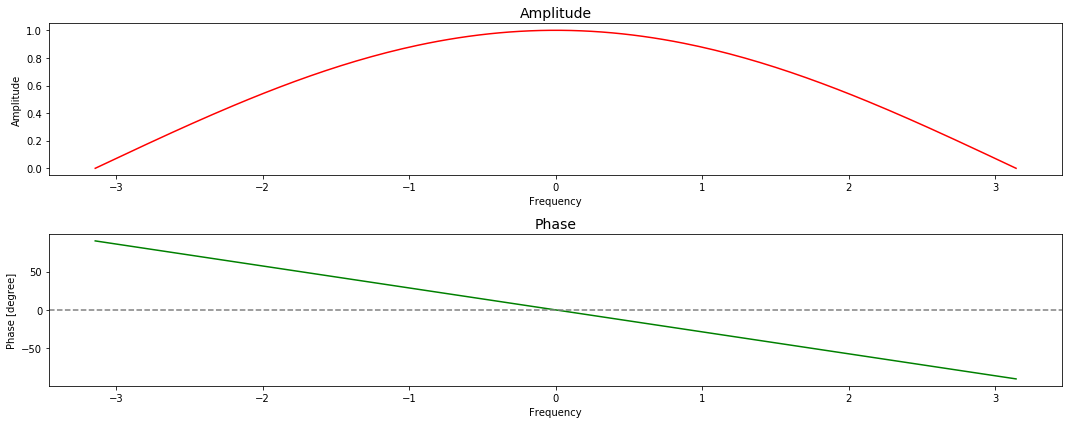

In [14]:
b = [1/2, 1/2]
f, H = filtering.get_H_from_polynomials([b], plot=True)

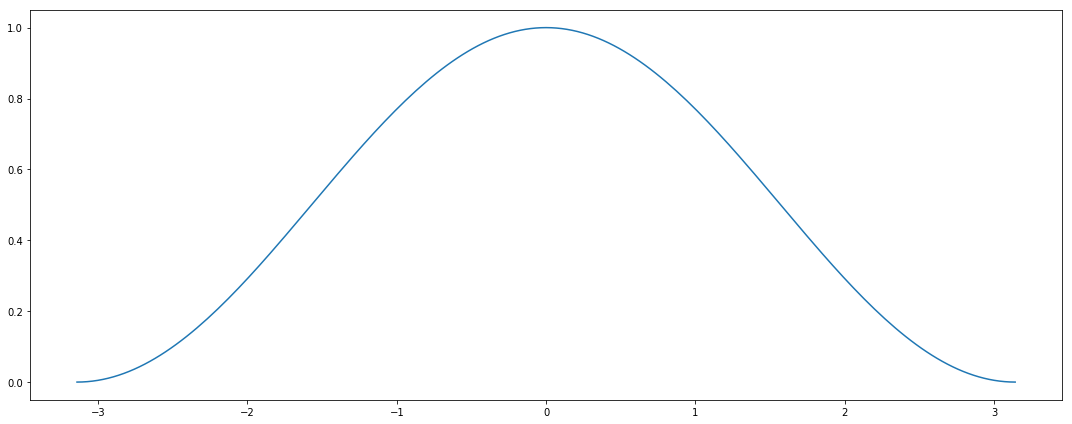

In [15]:
plt.figure(figsize = TWO_ROWS_FIGSIZE)
plt.plot(f, np.abs(np.conj(H)*H))
plt.tight_layout();

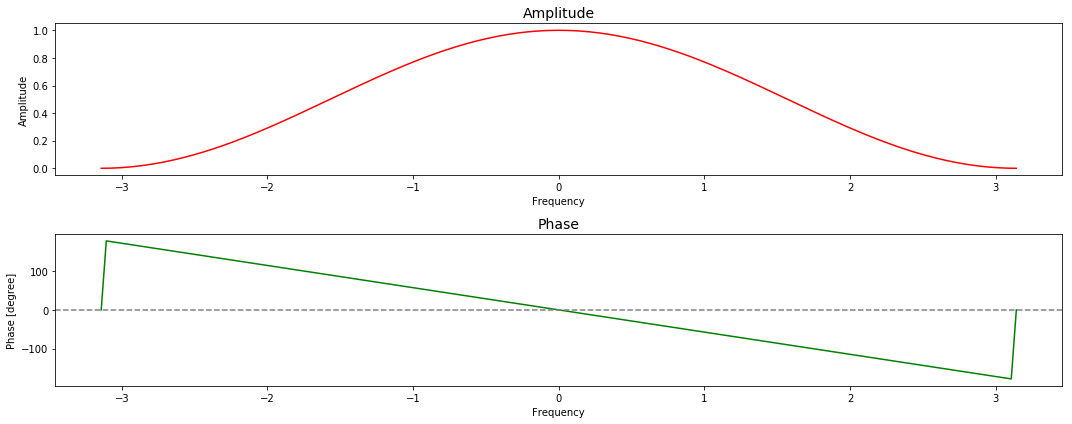

In [16]:
b = [[1/2, 1/2], [1/2, 1/2]]
f, H = filtering.get_H_from_polynomials(b, plot=True)

In [18]:
b1 = filtering.get_polynomials_product_coeff(b)
b1

array([0.25, 0.5 , 0.25])

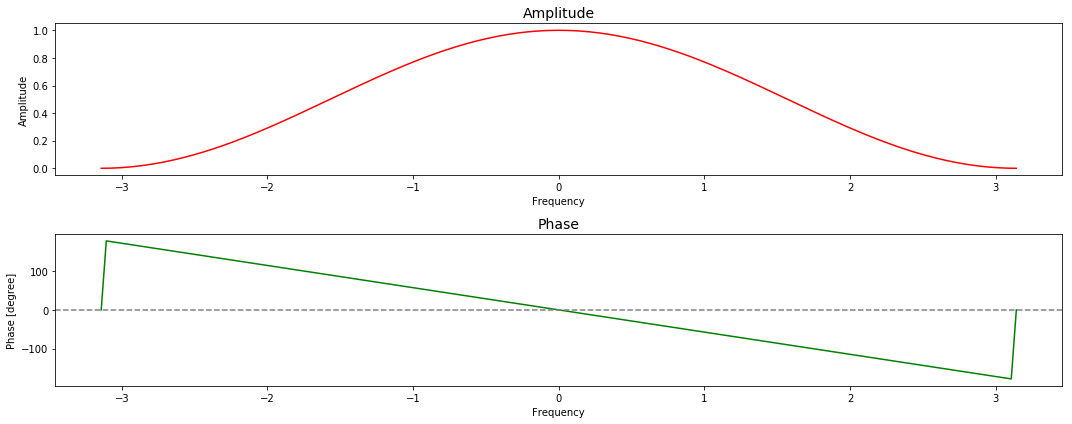

In [19]:
f, H = filtering.get_H_from_polynomials([b1], plot=True)

## 5.5.b Quantization
$$
\begin{align}
\Delta &= \frac{(B-A)}{2^R}  \\
\sigma_e^2 &= \frac{\Delta^2}{12}  \\
&= \frac{\frac{(B-A)^2}{2^{2R}}}{12}  \\
\sigma_x^2 &= \frac{(B-A)^2}{12}  \\
SNR = \frac{\sigma_x^2}{\sigma_e^2 } &= 2^{2R}  \\
SNR_{db} &= 10 log10 (SNR)  \\
&= 10 log10 (2^{2R})  \\
&= 10 \frac{log_2(2^{2R})}{log2(10)}  \\
&\approx 3.0 \times 2R \space dB \\
&= 6R \space dB
\end{align}
$$

## 5.5.c* Clipping, saturation and conpanding

#### μ-law compander
https://en.wikipedia.org/wiki/%CE%9C-law_algorithm  


$$
\begin{align}
y = C\{x[n]\} &= sgn(x[n]) \frac{ln(1+\mu|x[n]|)}{ln(1+\mu)}  \\
x = C^{-1}(y) &= sgn(y)(\frac{1}{\mu})((1+\mu)^{|y|} - 1)
\end{align}
$$

In [ ]:
n = np.linspace(-1, 1, 1000)
x = n

mu = 255
y = np.sign(x)* np.log(1+mu*np.abs(x)) / np.log(1+mu)

plt.plot(x, y);

In [ ]:
x1 = np.sign(y)* ((1+mu)**np.abs(y) - 1) / mu
plt.plot(x, x1);

## 5.8* Multirate signal processing

In [ ]:
w = dsp.get_freq_bins()
X = np.zeros_like(w)
N = len(w)
X[:N//2] = np.linspace(0, 1, N//2)
X[N//2:-1] = np.linspace(1, 0, N//2) 

In [ ]:
x = fourier.idtft(X)

### up sampling

In [ ]:
inserted_points = 3
x1 = np.concatenate( [np.hstack((e, np.zeros(inserted_points))) for e in x]).ravel()
x1.shape

In [ ]:
X1 = fourier.dtft(x1)

## 5.9* FIR-based sampling rate conversion

### Time-Varying-Local-Interpolation

$$
\begin{align}
x(n+\tau) &\approx x_L(n; \tau) \\
x_L(n;\tau) &= \sum_{k=-N}^{N} x[n-k]L_k^{(N)}(\tau) \\
define d_{\tau}[k] &= L_k^{(N)}(\tau), \space k = -N,...,N  \\
x_L(n;\tau) &= \sum_{k=-N}^N x[n-k]d_{\tau}[k] \\
x_L(n;\tau) &= (x*d_{\tau})[n] \\
\end{align}
$$  


$d_{\tau}[k]$ is a (2N+1)-tap FIR impulse response (dependent on $\tau$)

In [ ]:
N = [-1, 0, 1]
Y = [0.5, 2, -1]

li = Lagrange(fs = 1, steps_between_samples = 10)
polys = li.poly_fit(Y, N, plot = True)

In [ ]:
tau = 0.2
_, value = polys(tau)
value

In [ ]:
N = [-1, 0, 1]
YI = [1, 1, 1]
li = Lagrange(fs = 1, steps_between_samples = 10)
polys = li.poly_fit(YI, N, plot = True)
vs, v = polys(tau)
vs, v

In [ ]:
np.dot(np.array(Y), vs)

In [ ]:
h = li.time_varying_local_interpolate(tau)
h

In [ ]:
li.poly_fit(h, N = [-1, 0, 1], plot = True);

In [ ]:
np.dot(np.array(Y), h)